# Estimation of Obesity
Data set provided by UCI Dataset Repository.


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('obesity.csv')
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


## Data Preprocessing
Split data into training and testing set.

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale data to have equal weightage among feature.

In [111]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training
create a logistic regression model and train it.

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

Check the accuracy of the model.

In [114]:
model.score(X_test, y_test)

0.789598108747045

## Model tunning
Since our accuracy is not the best, we can try to tune the model to get better results. To accomplish this, we are going to use multiple feature wrapping methods to find the best combination of features.

### Sequential Forward Selection

In [115]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [116]:
SFS = SFS(model, k_features=9, forward=True, floating=False, scoring='accuracy', cv=0)

In [117]:
SFS.fit(X_train, y_train)
SFS.subsets_[9]

{'feature_idx': (0, 1, 2, 3, 6, 10, 14, 15, 17),
 'cv_scores': array([0.7813981]),
 'avg_score': 0.7813981042654028,
 'feature_names': ('0', '1', '2', '3', '6', '10', '14', '15', '17')}

Plot the results. The red line represents the accuracy of the model with the selected features.

/Users/andres/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andres/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

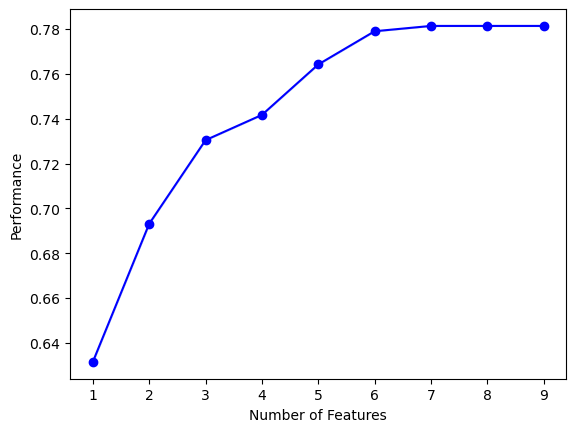

In [118]:
plot_sfs(SFS.get_metric_dict())


### Sequential Backward Selection

In [124]:
from mlxtend.feature_selection import SequentialFeatureSelector as SBS

In [125]:
SBS = SBS(model, k_features=7, forward=False, floating=False, scoring='accuracy', cv=0)
SBS.fit(X_train, y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(), forward=False,
                          k_features=(7, 7), scoring='accuracy')

In [126]:
SBS.subsets_[7]

{'feature_idx': (1, 2, 3, 4, 6, 11, 16),
 'cv_scores': array([0.75770142]),
 'avg_score': 0.7577014218009479,
 'feature_names': ('1', '2', '3', '4', '6', '11', '16')}

/Users/andres/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andres/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

<Figure size 640x480 with 0 Axes>

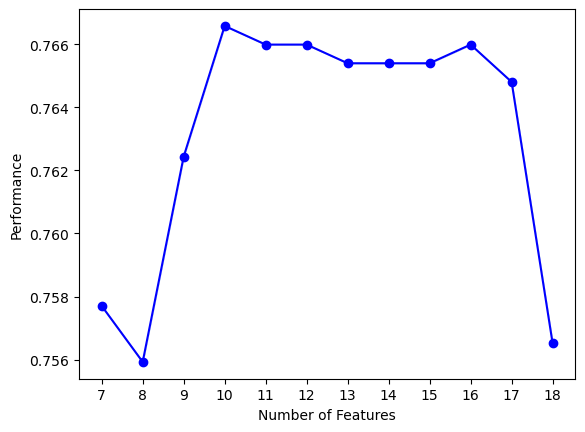

In [129]:
plt.clf()
plot_sfs(SBS.get_metric_dict())

### Recursive Feature Elimination


In [134]:
from sklearn.feature_selection import RFE

In [139]:
rfe = RFE(model, n_features_to_select=7)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=7)

In [140]:
rfe.score(X_test, y_test)

0.8014184397163121

## Analysis
We used three different feature selection methods to find the best combination of features. The results are shown below.


| Method | # Features | Accuracy  |
| ----------------------------- |-----------|-----------|
| Sequential Forward Selection  | 7         | 0.78139   |
| Sequential Backward Selection | 7         | 0.75770   |
| Recursive Feature Elimination | 7         | 0.80141   |

